# Import Libraries

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from tensorflow import keras
# from tensorflow.keras import *
import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis (EDA)

## Understanding the data

## Import Datasets

In [6]:
dataset_path = 'C:/Users/vae.tiolamon/Documents/DHBW 4. Semester/Machine Learning Fundamentals/Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [7]:
print(df.head())
print(df.tail())

                                               image    label
0  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Arborio
1  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Arborio
2  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Arborio
3  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Arborio
4  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Arborio
                                                   image      label
74995  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Karacadag
74996  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Karacadag
74997  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Karacadag
74998  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Karacadag
74999  C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Karacadag


In [8]:
# Basic information
print(df.info())

# Summary statistics
print(df.describe())

# Count of images per label
print(df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   75000 non-null  object
 1   label   75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None
                                                    image    label
count                                               75000    75000
unique                                              75000        5
top     C:/Users/vae.tiolamon/Documents/DHBW 4. Semest...  Arborio
freq                                                    1    15000
label
Arborio      15000
Basmati      15000
Ipsala       15000
Jasmine      15000
Karacadag    15000
Name: count, dtype: int64


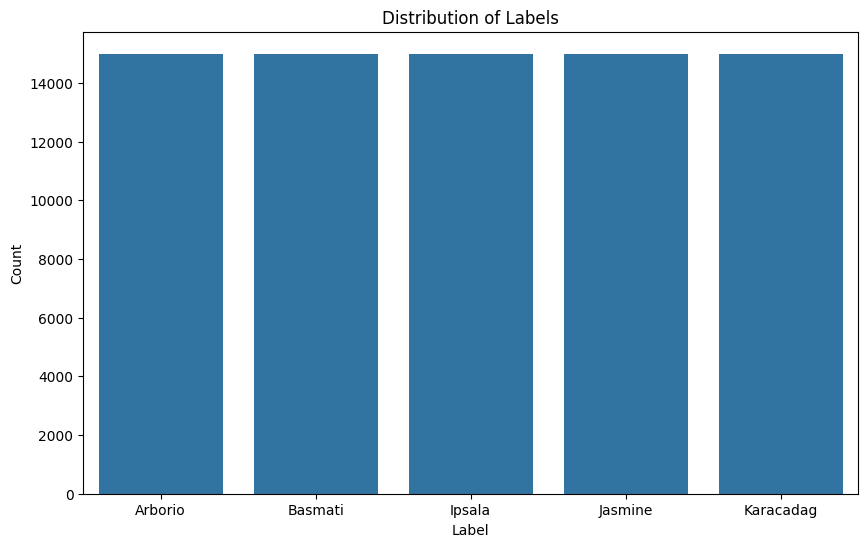

In [9]:
# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


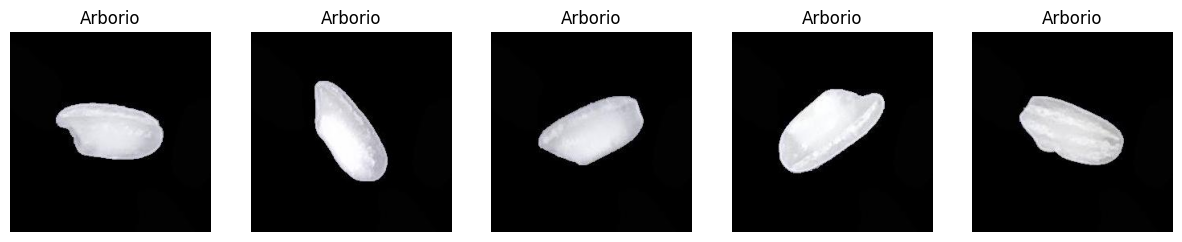

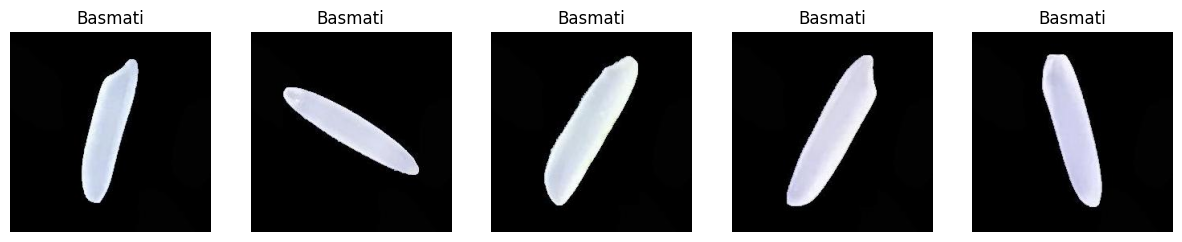

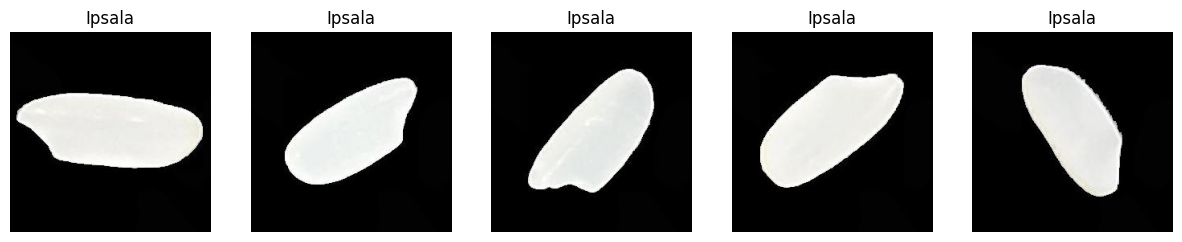

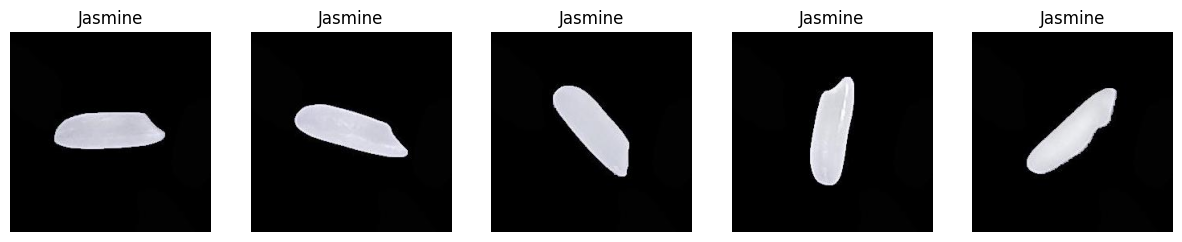

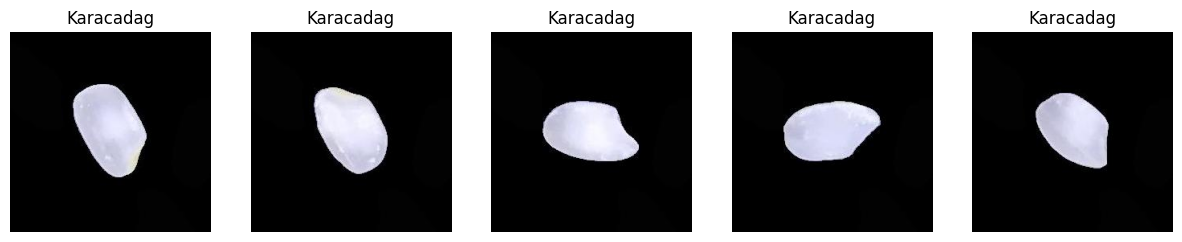

In [12]:
# Function to display images
def display_images(df, label, num_images=5):
    images = df[df['label'] == label]['image'].values[:num_images]
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(images):
        img = Image.open(image_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Display sample images for each label
for label in df['label'].unique():
    display_images(df, label)


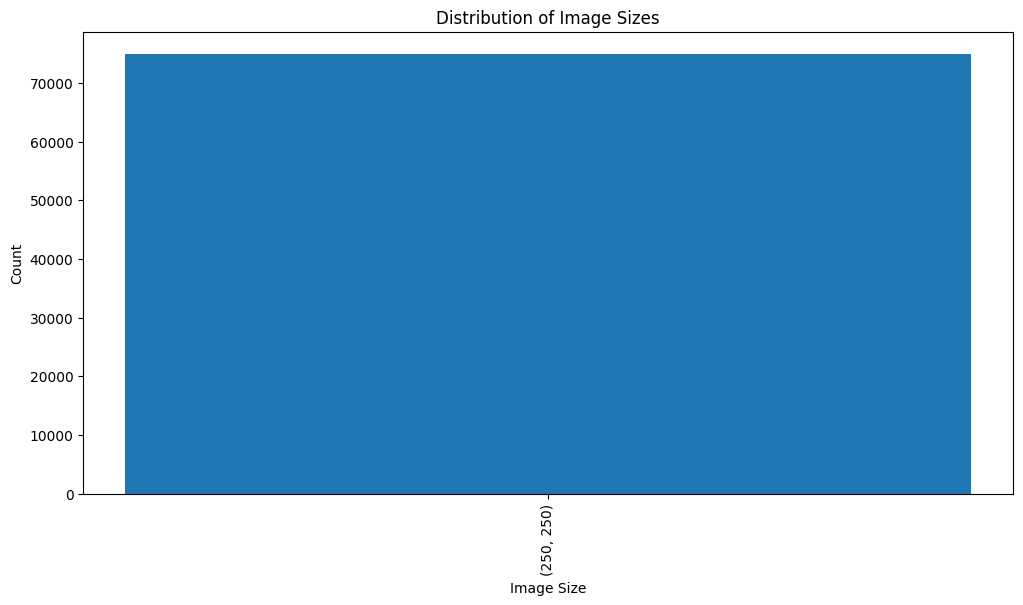

In [17]:
# Function to get image sizes
def get_image_size(image_path):
    img = Image.open(image_path)
    return img.size

# Get sizes of all images
df['image_size'] = df['image'].apply(get_image_size)

# Display unique image sizes
image_size_counts = df['image_size'].value_counts().reset_index()
image_size_counts.columns = ['image_size', 'count']

# Plot image sizes using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(image_size_counts['image_size'].astype(str), image_size_counts['count'])
plt.title('Distribution of Image Sizes')
plt.xlabel('Image Size')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


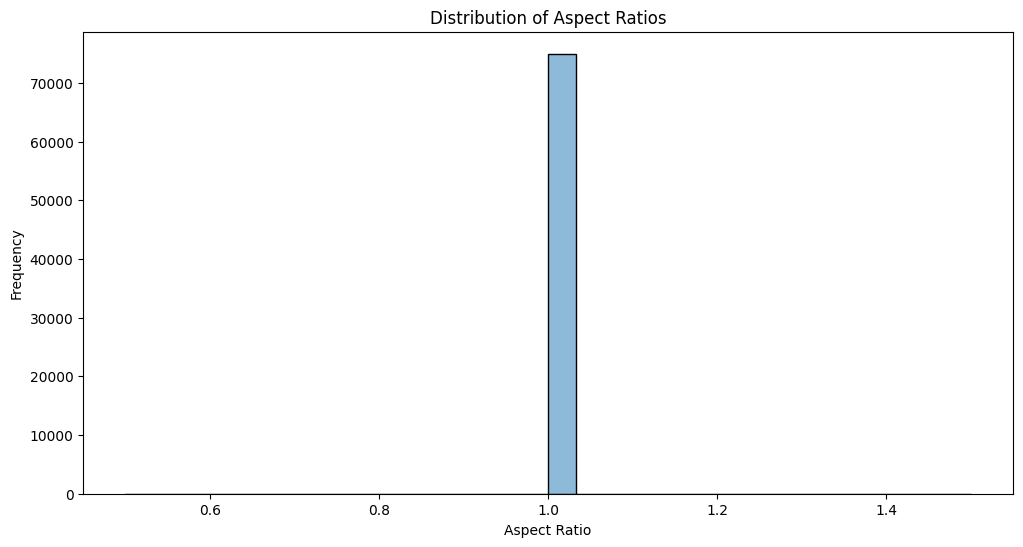

In [14]:
# Function to calculate aspect ratio
def get_aspect_ratio(image_path):
    img = Image.open(image_path)
    width, height = img.size
    return width / height

# Get aspect ratios of all images
df['aspect_ratio'] = df['image'].apply(get_aspect_ratio)

# Plot aspect ratio distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['aspect_ratio'], bins=30, kde=True)
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


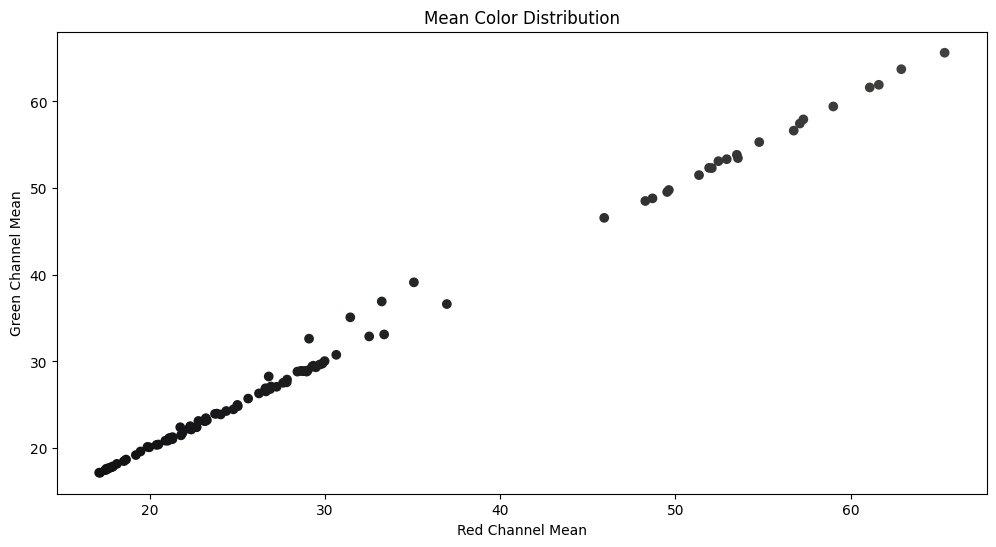

In [15]:
# Function to get mean color
def get_mean_color(image_path):
    img = Image.open(image_path)
    img = np.array(img)
    return img.mean(axis=(0, 1))

# Get mean colors of a sample of images
sample_images = df.sample(100)['image']
mean_colors = np.array([get_mean_color(img) for img in sample_images])

# Plot mean colors
plt.figure(figsize=(12, 6))
plt.scatter(mean_colors[:, 0], mean_colors[:, 1], c=mean_colors / 255.0)
plt.title('Mean Color Distribution')
plt.xlabel('Red Channel Mean')
plt.ylabel('Green Channel Mean')
plt.show()
